# Chapter07 확률분포(Probability Distribution) 

- <a href="#7.2연속확률분포">7.2 연속확률분포</a>

In [48]:
# 워닝 메시지 안나오게 하는 방법
import warnings
warnings.filterwarnings('ignore')

# 공통으로 사용하는 라이브러리 가져오기
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (5,3)
plt.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕'으로 설정 
plt.rcParams['axes.unicode_minus'] = False     # 그래프에서 (-)숫자표시

-----------------

#### scipy 확률분포 클래스
- 이산 : bernoulli (베르누이분포)- 이진분류
- 이산 : **binom (이항분포) - 이진분류**
- 이산 : **multinomial (다항분포) - 다중분류**
- 이산 : geometric(기하분포)
- 이산 : poisson (포아송분포)

- 연속 : uniform (균일분포)
- 연속 : **norm (정규분포)**
- 연속 : beta (베타분포)
- 연속 : gamma (감마분포)
- 연속 : t (스튜던트 t분포)
- 연속 : f (F분포)
- 연속 : chi2 (카이제곱분포)
- 연속 : dirichlet (디리클리분포)    
- 연속 : **multivariate_normal (다변수 정규분포)**

#### 확률분포 클래스 사용방법

In [49]:
# 정규분포 클래스 사용 방법
rv = sp.stats.norm()

# 모수지정하여 클래스 사용 방법
# loc: 분포의 기대값, scale : 분포의 표준편차
rv = sp.stats.norm(loc=1, scale=2) # 기대값1 표준편차2인 정규분포 객체

#### Scipy 확률분포 메서드
- pmf : 확률질량함수(probability mass function) 
- pdf : 확률밀도함수(probability density function)
- cdf : 누적분포함수(cumulative distibution function)
- ppf : 누적분포함수의 역함수(inverse cumulative distibution function)
- sf  : 생존함수(survival function) = 1 - 누적분포함수
- isf : 생존함수의 역함수(inverse survival function) --> 꼬리확률 구할 때 사용 rv.isf(0.05)   #상위 5%인 z점
- rvs : 랜덤 표본 생성(random variable sampling)
- **생존함수**: 생존분석은 통계학의 한 분야로, 어떠한 현상이 발생하기까지에 걸리는 시간에 대해 분석하는 것이다. 예를 들면, 생명체의 관찰시작부터 사망에 이르는 시간을 분석하는 것이 있다

#### 확률분포 메서드 사용방법 
- 확률밀도함수(probability density function)

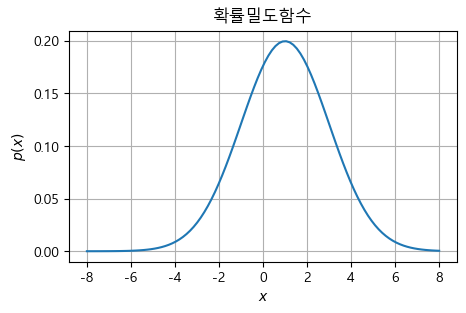

In [50]:
xx = np.linspace(-8, 8, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.title('확률밀도함수')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid()
plt.show()

- 누적분포함수(cumulative distibution function)

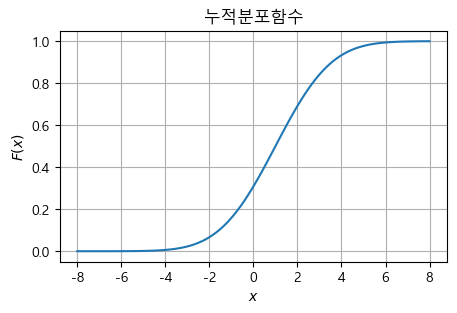

In [51]:
xx = np.linspace(-8, 8, 100)
cdf = rv.cdf(xx)
plt.plot(xx, cdf)
plt.title('누적분포함수')
plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.grid()
plt.show()

- 랜덤 표본 생성(random variable sampling)

In [52]:
# size = 표본 생성시 생성될 표본 크기
# random_state = 표본 생성시 사용되는 시드(seed)값
rv.rvs(size=(3,5), random_state=0)

array([[ 4.52810469,  1.80031442,  2.95747597,  5.4817864 ,  4.73511598],
       [-0.95455576,  2.90017684,  0.69728558,  0.7935623 ,  1.821197  ],
       [ 1.28808714,  3.90854701,  2.52207545,  1.24335003,  1.88772647]])

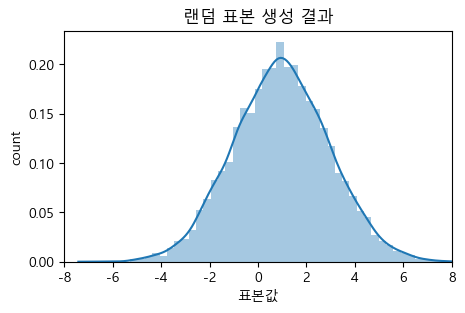

In [53]:
import seaborn as sns
sns.distplot( rv.rvs(size=10000, random_state=0) )
plt.title('랜덤 표본 생성 결과')
plt.xlabel('표본값')
plt.ylabel('count')
plt.xlim(-8, 8)
plt.show()

--------

## <a name="7.2연속확률분포">7.2 연속확률분포</a>

### 연속확률변수에서 다룬 내용(함수)

[예제 6-7]에 대해서 구현함 :  **$f(x) = {1 \over 8}x,   (0 \le x \le4)$**

- **확률변수의 상태공간과 확률밀도함수 f(x)**

In [54]:
# 연속확률변수 확률밀도함수 구현하기
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (5,3)
plt.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕'으로 설정 
plt.rcParams['axes.unicode_minus'] = False     # 그래프에서 (-)숫자표시

# 상태구간
x_range = np.array([0,4]) # 0~4의 구간일 경우

# 확률밀도함수
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return (1/8*x)
    else:
        return 0
    
# 연속확률변수
X = [x_range, f]

- **확률: 면적구하기**

In [55]:
from scipy import integrate

integrate.quad(f, 2, 3)  #f:피적분함수   #2, 3: 적분범위  
# 결과값 의미 
# (0.3125, 3.469446951953614e-15)-->(적분값, 추정오차)

(0.3125, 3.469446951953614e-15)

#### 연속확률변수와 관련 있는 함수:  기대값E(X) & 분산Var(X) 등
- 기댓값 $\mu = E(X) $= **$\int_{-\infty}^{\infty} xf(x)dx  $**
- 분산 Var(X) =  $E(X^2) -\mu^2$
- $E(X^2)$ = $\int_{-\infty}^{\infty} x^2f(x)dx$

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate

# 기대값:평균
def E(X, g=lambda x:x):
    x_range, f = X
    
    def integrand(x):
        return g(x) * f(x)
    
    return integrate.quad(integrand, -np.inf, np.inf)[0]


# 분산
def V(X, g=lambda x:x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x)-mean)**2 * f(x)
    
    return integrate.quad(integrand, -np.inf, np.inf)[0]


def check_prob(X):
    x_range, f = X
    
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf), 4)
    
    print(f'기대값 E(X): {E(X):.4}')
    print(f'분산   V(X): {V(X):.4}')
    print(f'표준편차STD(X): {V(X)**(1/2):.4}') 
    

# 확률
def get_prob(X, a, b):
    x_range, f = X
    
    prob_sum = np.round(integrate.quad(f, a, b), 4)
    
    print(f'확률: {prob_sum[0]}')
    

# 그래프(구간 색칠하기)
def plot_prob(X, x_min, x_max):
    x_range, f = X
    
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]
    
    xs = np.linspace(x_min, x_max, 100)
        
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)    
    
    ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray', linestyle='--')
    ax.legend()

    plt.show() 


- [문제] $P(2 < X \le 3)$ 확률은?

확률: 0.3125


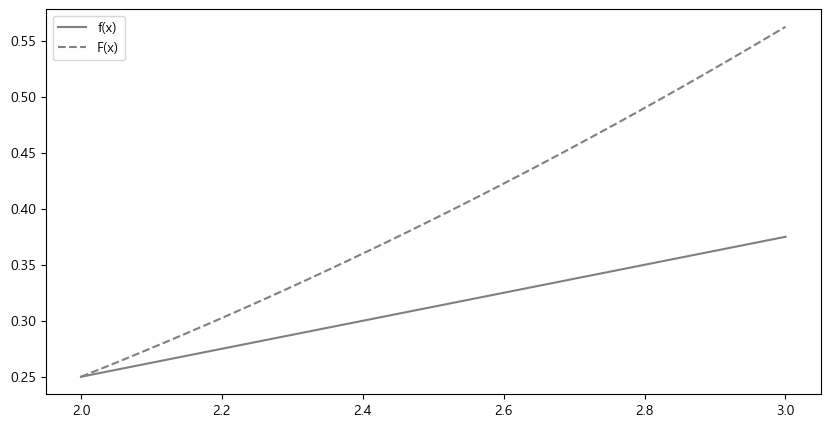

In [57]:
get_prob(X, 2, 3)   # 연속확률변수 확률
plot_prob(X, 2, 3)  # 연속확률변수 그래프

------------------------------

### 중심극한의정리-->정규분포 
- 자연현상이나 사회현상에서 얻게 되는 대부분의 자료에 대한 히스토그램은 자료의 수가 클수록 계급간격이 좁아지고, 그림과 같이 좌우 대칭인 종 모양 의 곡선에 가까워진다. 
- N개의 임의의 분포로부터 얻은 표본의 평균은 N이 증가할수록 기댓값이 μ, 분산이 $σ^2$인 정규분포로 수렴한다<br>-->**중심극한의정리**(여러 확률변수의 합이 정규분포와 비슷한 분포를 이루는 현상을 말한다)
<br>
- **[참고]** QQ-plot(Quantile-Quantile Plot): 두 변수간의 분포 비교로 데이터가 정규분포를 따르는지 확인하는 방법으로 scipy에서는 scipy.stats.probplot() 함수로 그림을 그려 확인할 수 있다.

(5000, 1)
(5000, 2)
(5000, 10)


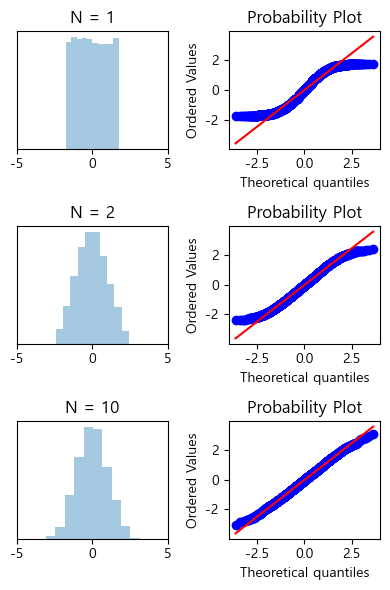

In [58]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 6))

np.random.seed(0)
xx = np.linspace(-2, 2, 100)

for i, N in enumerate([1, 2, 10]):
    X = np.random.rand(5000, N)    # 0~1사이의 균일분포 실수값을 5000행, N열 배열로 만듦 
    print(X.shape)
    Xbar = (X.mean(axis=1) - 0.5) * np.sqrt(12 * N)    
    ax = plt.subplot(3, 2, 2 * i + 1)  # 막대그래프
    sns.distplot(Xbar, bins=10, kde=False, norm_hist=True)
    plt.xlim(-5, 5)
    plt.yticks([])
    
    ax.set_title(f"N = {N}")
    plt.subplot(3, 2, 2 * i + 2)
    sp.stats.probplot(Xbar, plot=plt) #QQ-plot: 정규분포를 따르는지 확인

plt.tight_layout()
plt.show()

- 이항분포 B(n, p)에서 p가 일정하고 n이 커지면 이항분포의 그래프는 그림과 같이 종 모양에 가까워진다.
- 이항분포에서 p가 커지면 그래프가 오른쪽으로 치우친다.

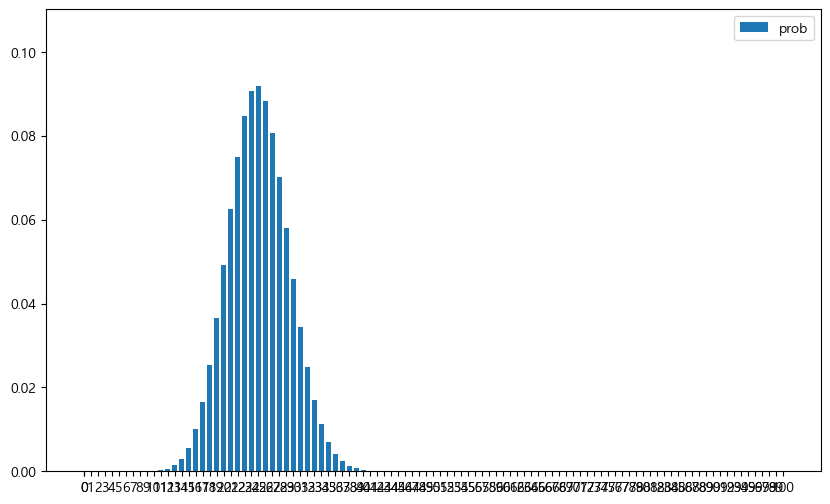

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    
    def f(x):
        if x in x_set:
            return comb(n,x) * p**x * (1-p)**(n-x)
        else:
            return 0
        
    return x_set, f

def plot_prob_bi(X):
    x_set, f = X
    prob = np.array([ f(x_k) for x_k in x_set]) 
    
    fig = plt.figure(figsize=(10,6))
    ax  = fig.add_subplot(111) # (1,1,1)
    
    ax.bar(x_set, prob, label='prob')
    ax.set_xticks(np.append(x_set, E(X)))   #x축의 값 출력
    ax.set_ylim(0, prob.max()*1.2)          #y축의 한계 지정
    ax.legend()
   
    plt.show()

n = 100    # n의 개수를 크게 해보기 --> 그래프가 종모양으로 변경됨
p = 0.25   # 0.3, 0.5, 0.7 변경해보기
X = Bin(n,p)
plot_prob_bi(X)

-------------------

### 파이썬으로 정규분포 구현하기

In [60]:
#𝑍 ~ N(0,1) 정규화를 따른 정규분포
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f

기대값 E(X): 2.0
분산   V(X): 0.25
표준편차STD(X): 0.5


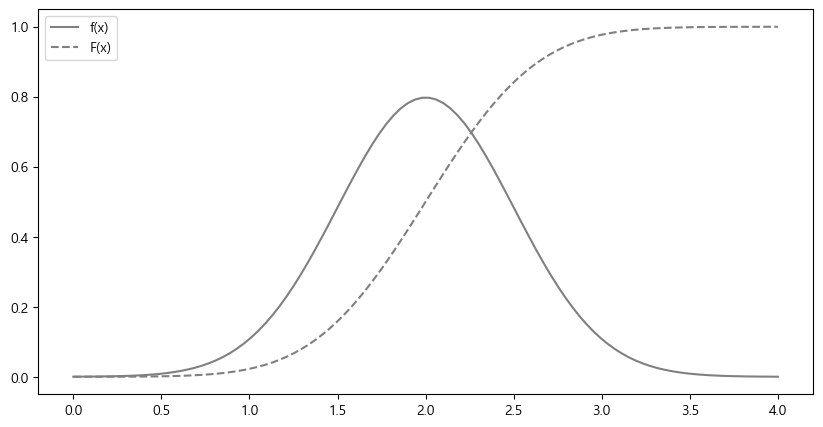

In [61]:
#X ~ N(2, 0.5^2 )
mu, sigma = 2, 0.5
X = N(mu, sigma)
X

check_prob(X)      # 기대값, 분산, 표준편차
plot_prob(X, 0, 4) # (0~4)의 확률 그래프 그리기

### [실습] 정규분포를 이용한 확률 구하기
남자 고등학생 키의 평균이 170cm이고 표준편차가 5cm라면, 우연히 만난 남자 고등학생의 키는 N(170, 5^2)를 따른 다고 할 수 있다. 이 사실을 바탕으로 우연히 만난 남자 고등학생의 키가 165cm이상 175cm 이하일 확률은?

In [62]:
mu, sigma = 170, 5
X = N(mu, sigma)

# 확률 구하기
a, b = 165, 175
get_prob(X, a, b)  

확률: 0.6827


기대값 E(X): 4.157e-72
분산   V(X): 3.226e-70
표준편차STD(X): 1.796e-35


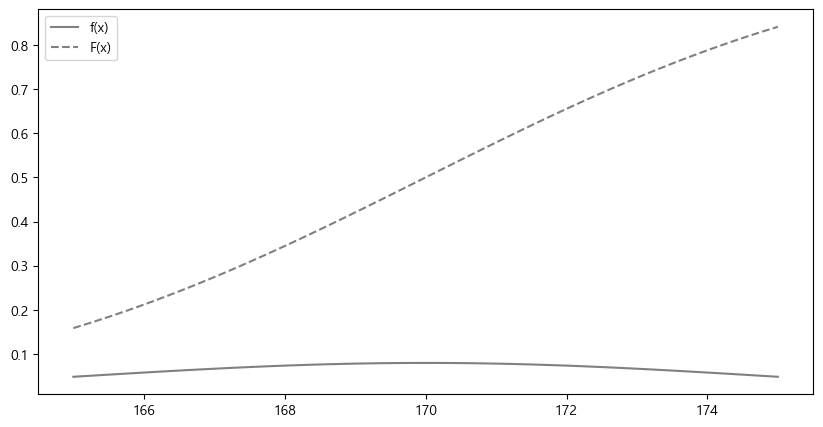

In [63]:
#기대값과 분산, 표준편차
check_prob(X)    

#정규분포 그래프: P(a <= X <= b) 
plot_prob(X, a, b)

### [실습] 정규분포를 이용한 확률 구하기
모의고사 평균 점수가 70점이고 표준편차가 8점이라면, 우연히 만난 학생의 점수는 N(70, 8^2)을 따른다고 할 수 있다. 이 사실을 바탕으로 우연히 만난 학생의 점수가 54점 이상 86점 이하일 확률은?

In [64]:
mu, sigma = 70, 8
Y = N(mu, sigma)

# 확률 구하기
c, d = 54, 86
get_prob(Y, c, d)  


확률: 0.9545


---

### scipy 연속확률분포 클래스 종류 
- 연속 : uniform (균일분포)
- 연속 : norm (정규분포)
- 연속 : beta (베타분포)
- 연속 : gamma (감마분포)
- 연속 : t (스튜던트 t분포)
- 연속 : f (F분포)
- 연속 : chi2 (카이제곱분포)
- 연속 : dirichlet (디리클리분포)    
- 연속 : multivariate_normal (다변수 정규분포)

#### * 정규분포(scipy.stats.norm)
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html

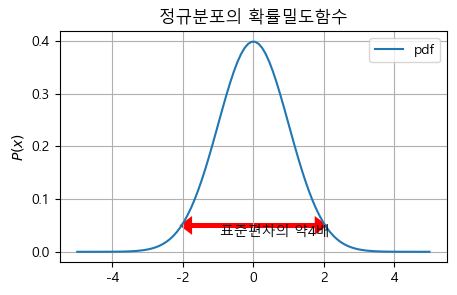

In [65]:
import scipy as sp

mu, std = 0, 1
rv = sp.stats.norm(mu, std) #  확률밀도함수

xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx), label='pdf')
# plt.plot(xx, rv.cdf(xx), label='cdf')
plt.arrow(0, 0.05, 2, 0, lw=3, color='r',
         head_width=0.02, head_length=0.2, length_includes_head=True)
plt.arrow(0, 0.05, -2, 0, lw=3, color='r',
         head_width=0.02, head_length=0.2, length_includes_head=True)
plt.text(-0.95, 0.03, '표준편차의 약4배')
plt.ylabel('$P(x)$')
plt.title('정규분포의 확률밀도함수')
plt.legend()
plt.grid()
plt.show()

#### * 정규분포 확률변수 표본값을 무작위로 생성
- https://seaborn.pydata.org/generated/seaborn.distplot.html
- kde(Kernel Density Estimator):  커널 밀도 추정: 분포를 부드럽게 곡선화시켜 주는 옵션
- rug : 데이터의 위치

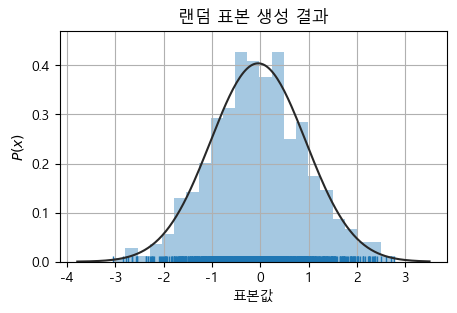

In [66]:
np.random.seed(0)
x = rv.rvs(1000)
# x = rv.rvs(1000)
# print(x)

# sns.distplot(x)
sns.distplot(x, rug=True, kde=False, fit=sp.stats.norm)
plt.title('랜덤 표본 생성 결과')
plt.xlabel('표본값')
plt.ylabel('$P(x)$')
plt.grid()
plt.show()

### [실습] scipy.stats에 있는 norm함수 사용하여 확률구하기
남자 고등학생 키의 평균이 170cm이고 표준편차가 5cm라면, 우연히 만난 남자 고등학생의 키는 N(170, 5^2)를 따른 다고 할 수 있다. 이 사실을 바탕으로 우연히 만난 남자 고등학생의 키가 165cm이상 175cm 이하일 확률은?

In [67]:
import scipy as sp

MEAN, STD = 170, 5 #평균:170, 표준편차:5
x1, x2 = 165, 175
rv = sp.stats.norm(loc=MEAN, scale=STD)  

# 누적분포함수에 의해 구간 확률 계산
print(f'P({x1}<=X<={x2})= {rv.cdf(x2) - rv.cdf(x1)}')

P(165<=X<=175)= 0.6826894921370859


- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hlines.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html

154.76928472600036 183.7967755701079


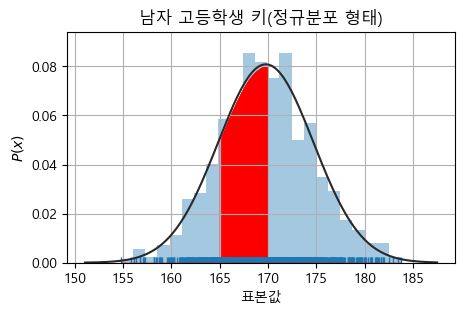

In [68]:
# 랜덤표본 생성하여  정규분포 그래프 그리기
np.random.seed(0)
X = rv.rvs(1000)
Y = rv.pdf(X)
# Y = sp.stats.norm.pdf(X, loc=MEAN, scale=STD)

sns.distplot(X, rug=True, kde=False, fit=sp.stats.norm)
plt.title('남자 고등학생 키(정규분포 형태)')
plt.xlabel('표본값')
plt.ylabel('$P(x)$')

print(min(X), max(X))
plt.hlines(0, min(X), max(X), alpha=0.3, color='red')
plt.fill_between(X, Y, where=(X>=165) & (X<=170), color='red', alpha=0.3)

plt.grid()
plt.show()

### 정규분포 그래프 예제  

#### * 정규분포 그래프 예제(붓꽃 데이터)
붓꽃 중 특정한 종(setosa)의 꽃잎 길이(petal length (cm))에 대한 히스토그램--> 정규분포와 비슷

In [69]:
from sklearn.datasets import load_iris

data = load_iris()
setosa_sepal_length = data['data'][:50, 2]  # petal length (cm)
setosa_sepal_length

sns.distplot(setosa_sepal_length, rug=True)
plt.tight_layout()
plt.grid()
plt.show()

ModuleNotFoundError: No module named 'sklearn'

#### * 정규분포 그래프 예제(미국 나스닥 수익율)
- pandas_datareader 라이브러리의 DataReader 함수는 웹 상의 데이터를 DataFrame 객체로 만드는 기능을 제공함


#### 라이브러리 설치하기

In [ ]:
%pip install pandas_datareader


                                              0.0/109.5 kB ? eta -:--:--
     -----------------------------------    102.4/109.5 kB 5.8 MB/s eta 0:00:01
     -------------------------------------- 109.5/109.5 kB 2.1 MB/s eta 0:00:00
                                              0.0/3.8 MB ? eta -:--:--
     ------                                   0.6/3.8 MB 40.3 MB/s eta 0:00:01
     -----------                              1.1/3.8 MB 14.3 MB/s eta 0:00:01
     ------------------                       1.8/3.8 MB 12.5 MB/s eta 0:00:01
     ----------------------                   2.2/3.8 MB 12.4 MB/s eta 0:00:01
     ---------------------------              2.6/3.8 MB 12.0 MB/s eta 0:00:01
     ----------------------------             2.7/3.8 MB 10.0 MB/s eta 0:00:01
     ----------------------------             2.7/3.8 MB 9.7 MB/s eta 0:00:01
     -------------------------------          2.9/3.8 MB 7.8 MB/s eta 0:00:01
     -------------------------------------    3.6/3.8 MB 8.4 MB/s

In [ ]:
import pandas_datareader as pdr

help(pdr)

Help on package pandas_datareader:

NAME
    pandas_datareader

PACKAGE CONTENTS
    _testing
    _utils
    _version
    av (package)
    bankofcanada
    base
    compat (package)
    conftest
    data
    econdb
    enigma
    eurostat
    exceptions
    famafrench
    fred
    iex (package)
    io (package)
    moex
    nasdaq_trader
    naver
    oecd
    quandl
    stooq
    tests (package)
    tiingo
    tsp
    wb
    yahoo (package)

FUNCTIONS
    DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.1, session=None, api_key=None)
        Imports data from a number of online sources.
        
        Currently supports Google Finance, St. Louis FED (FRED),
        and Kenneth French's data library, among others.
        
        Parameters
        ----------
        name : str or list of strs
            the name of the dataset. Some data sources (IEX, fred) will
            accept a list of names.
        data_source: {str, None}
            the data

#### 과거 12년간의 미국 나스닥 주가지수 : 그래프

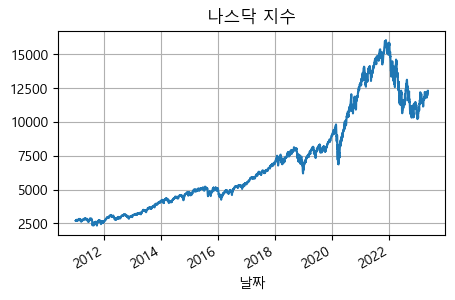

In [ ]:
import pandas as pd
import pandas_datareader as pdr

symbol = 'NASDAQCOM'
data = pd.DataFrame()

data[symbol] = pdr.DataReader(symbol, data_source='fred',
                            start='2011-01-01', end='2023-05-10')[symbol]

data = data.dropna()
data
data.plot(legend=False)
plt.xlabel('날짜')
plt.title('나스닥 지수')
plt.grid()
plt.show()

#### 과거 12년간의 미국 나스닥 주가지수 : 주가지수 데이터

In [ ]:
import pandas_datareader as pdr

symbol = 'NASDAQCOM'
df = pdr.DataReader(symbol, data_source='fred',
                            start='2011-01-01', end='2023-05-10')
data = df.copy()
data = data.dropna()
data.head()

,NASDAQCOM
DATE,
2011-01-03,2691.52
2011-01-04,2681.25
2011-01-05,2702.20
2011-01-06,2709.89
2011-01-07,2703.17


In [ ]:
# 일간 수익률과 변동성
daily_returns = data.pct_change().dropna()  # 행과 행의 차이 백분율을 구해 결측치 제거
daily_returns
mean= daily_returns.mean().values[0]
std = daily_returns.std().values[0]
print(f'평균 일간수익률 : {mean*100:>3.2f}%')
print(f'평균 일간변동성 : {std*100:>3.2f}%')

평균 일간수익률 : 0.06%
평균 일간변동성 : 1.30%


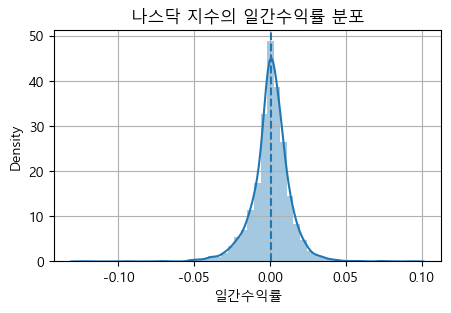

In [ ]:
# 일간 수익률 분포그래프 그리기
# - KDE(Kernel Density Estimator):  커널 밀도 추정
#      분포를 부드럽게 곡선화시켜 주는 옵션
sns.distplot(daily_returns, kde=True)
ymin, ymax = plt.ylim()
plt.vlines(x=mean, ymin=0, ymax=ymax, ls='--')
plt.ylim(0, ymax)
plt.title('나스닥 지수의 일간수익률 분포')
plt.xlabel('일간수익률')
plt.grid()
plt.show()

#### 국내 특정 주가(삼성전자) 정보 그래프로 나타내기

In [ ]:
# http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020201
import pandas_datareader as pdr

name = '삼성전자' # 삼성전자(KRX : 005930), 현대자동차(KRX: 005380)
symbol = '005930'  

data = pd.DataFrame()

df = pdr.DataReader(symbol, data_source='naver',
                   start='1980-01-01', end='2023-05-10')
df
data = df.copy()
data = data.drop(columns=['Open','High','Low','Volume']) # 컬럼삭제
data = data.dropna()
data = data.astype({'Close':'int'})  # 컬럼타입 정수로 변환 (종가 데이터만)
data


# 일간 수익률과 변동성
daily_returns = data.pct_change().dropna()  # 결측치 제거
daily_returns
mean= daily_returns.mean().values[0]
std = daily_returns.std().values[0]
print(f'평균 일간수익률 : {mean*100:>3.2f}%')
print(f'평균 일간변동성 : {std*100:>3.2f}%')

sns.distplot(daily_returns, kde=True)
ymin, ymax = plt.ylim()
plt.vlines(x=mean, ymin=0, ymax=ymax, ls='--')
plt.ylim(0, ymax)
plt.title(f'{name} 주가 일간수익률 분포')
plt.xlabel('일간수익률')
plt.grid()
plt.show()

---------

### [실습] 예제 7-6 : 정규분포에 대한 평균과 표준편차 구하기

- 방법1: 직접 만든 함수 이용

In [ ]:
#기대값과 분산
check_prob( N(1, 4**(1/2)) )  # N(1, np.sqrt(4))
print('-'*30)




기대값 E(X): 1.0
분산   V(X): 4.0
표준편차STD(X): 2.0
------------------------------


- 방법1: scipy 라이브러리 이용
- 평균: rv.mean(), 분산: rv.var() 표준편차: rv.std()

In [ ]:
import scipy as sp

rv = sp.stats.norm(loc=1, scale=4**(1/2))   # scale=np.sqrt(4)
print(f'평균: {rv.mean()}, 표준편차: {rv.std()}')




평균: 1.0, 표준편차: 2.0


### [참고] 확률분포와 꼬리확률, 중심확률 확인

In [70]:
rv = sp.stats.norm(loc=0, scale=1)

In [71]:
#확률밀도함수 : P(X=x) 
rv.pdf(2) 

0.05399096651318806

In [72]:
#확률분포함수 : P(X<=x) 
rv.cdf(1.7)

0.955434537241457

In [73]:
# sf(survival function: 생존함수) : 어떠한 현상이 발생하기까지에 걸리는 시간
# sf = 1 - 누적분포함수 () 
# isf(inverse survival function) :  생존함수의 역함수

#상위 100𝛼"%" 점:Z𝛼 인 꼬리확률: 백분위수를 Za 로 표시
rv.isf(0.3)   #상위 30%인 z점

0.5244005127080409

In [74]:
rv.isf(0.05)   #상위 5%인 z점

1.6448536269514729

In [75]:
#확률이 a가 되는 가운데 부분의 구간(면적)
rv.interval(0.9)   # 90%구간

(-1.6448536269514729, 1.6448536269514722)

In [76]:
#오른쪽과 왼쪽 5%씩 남는 구간과 같다.
rv.isf(0.95), rv.isf(0.05)

(-1.6448536269514722, 1.6448536269514729)

In [77]:
rv.isf(0.9750)   

-1.959963984540054

### [실습] 예제 7-7 : 표준정규분포의 확률 계산

In [78]:
import scipy as sp

rv = sp.stats.norm(loc=0, scale=1)

print(f'a.P(Z<=-1.45)   : {round(rv.cdf(-1.45), 4)}')




a.P(Z<=-1.45)   : 0.0735


### [실습] 예제 7-8 : z 구하기

In [79]:
alpha = 0.975

# 오른쪽과 왼쪽 구간 대칭
rv.isf(alpha), rv.isf(1-alpha)

(-1.959963984540054, 1.959963984540054)

### 정규분포 확률 계산
#### * scipy norm 함수로 확률 계산
교재 예제 $X \sim N(30, 4^2)$에 대해 $P(27\le X \le 35)$의 확률은?

In [80]:
import scipy as sp

rv = sp.stats.norm(loc=30, scale=16**(1/2))

print(f'P(27<=X<=35): {round(rv.cdf(35) - rv.cdf(27), 4)}')

P(27<=X<=35): 0.6677


### [실습] 예제 7-9 : 정규분포 확률 구하기

In [81]:
rv = sp.stats.norm(loc=75, scale=25**(1/2))

print(f'P(X<=64)    : {round(rv.cdf(64), 4)}')




P(X<=64)    : 0.0139


### [실습] 예제 7-10 : 정규분포 확률 구하기

In [82]:
mu1, std1 = 75, 16
mu2, std2 = 65, 9
rv = sp.stats.norm(loc=mu1+mu2, scale=(std1+std2)**(1/2) )

print(f'a.P(X+Y<=146.3)   : {round(rv.cdf(146.3), 4)}')




a.P(X+Y<=146.3)   : 0.8962


----------------------

### 이항분포의 정규근사
모수 n과 p인 이항분포에 대하여 $np \ge 5$, $nq \ge 5$인 경우, n이 커질수록 이항분포 $B(n, p)$는 정규분포 $N(np, npq)$에 근사하며, 이것을 이항분포의 정규근사(normal approximation)라 한다

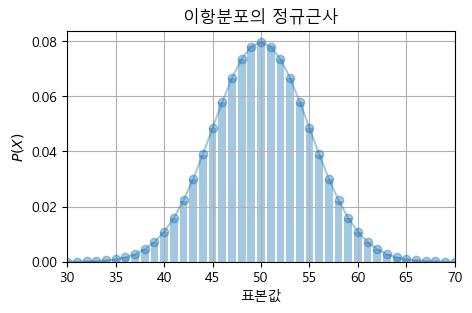

In [83]:
n, mu1  = 100, 0.5
mu2,std = 50, 5
rv1 = sp.stats.binom(n, mu1)
rv2 = sp.stats.norm(mu2, std)

xx = np.arange(n+1)
plt.plot(xx, rv1.pmf(xx), 'o-', alpha=0.4)  # 이항분포
plt.bar(xx, rv2.pdf(xx), alpha=0.4)         # 정규분포
plt.xlim(30, 70)  # x축 범위
plt.xlabel('표본값')
plt.ylabel('$P(X)$')
plt.title('이항분포의 정규근사')
plt.grid()
plt.show()

### [실습] 예제 7-11 : 이항분포의 정규근사 확률 구하기
5지선다형인 100문제를 무작위로 선정하여 정답을 14개 이상 25개 이하로 맞출 근사확률은?

In [84]:
# N( np, np.sqrt(np(1-p)) )
n, p, q = 100, 0.2, 0.8 
a, b = 14, 25

# 근사확률 구하기
# 방법1
X = N(n*p, np.sqrt(n*p*q))
get_prob(X, a, b)


# 방법2
rv = sp.stats.norm(loc=n*p, scale=np.sqrt(n*p*q))
print(f'P({a}<=X<={b}): {rv.cdf(b) - rv.cdf(a)}')

확률: 0.8275
P(14<=X<=25): 0.8275430250642866


**Q**.주사위를 720번 던져서 1의 눈이 105번 이상 145번 이하로 나올 근사확률은?

In [ ]:
# N( np, np.sqrt(np(1-p)) )
n, p, q =  
a, b =  

# 근사확률 구하기


---------

### 지수분포 
단위시간당 평균 λ번 발생하는 사건의 발생 간격을 따르는 확률분포 

In [ ]:
def Ex(lamda):
    x_range = [0, np.inf]
    def f(x):
        if x >= 0:
            return lamda * np.exp(-lamda * x)
        else:
            return 0
    return x_range, f

**Q**.하루당 평균 2건의 교통사고가 발생하는 지역에서 3일 이내 또 교통사고가 일어날 확률


In [ ]:
lamda, a, b = 2, 0, 3
X = Ex(lamda)

# 방법1
get_prob(X, a, b)
plot_prob(X, a, b)

# 방법2
rv = sp.stats.expon(scale=1/lamda)
print(f'P(X<={b}): {rv.cdf(b)}')

**Q**.1시간당 평균 10번 액세스하는 사이트에서 1분 이내에 또 액세스할 확률


In [ ]:
lamda, a, b = 10, 0, 1/60
X = Ex(lamda)

# 방법1
get_prob(X, a, b)
# plot_prob(X, a, b)

# 방법2
rv = sp.stats.expon(scale=1/lamda)
print(f'P(X<={b}): {rv.cdf(b)}')

### t-분포
- 정규분포에서 파생된 분포로 모평균의 구간추정 등에 사용되는 확률분포
- 현실의 데이터를 살펴보면 정규분포와 상당히 유사하지만 양 끝단의 비중이 정규분포에 비해 더 큰 데이터들을 발견할 수 있다. 분포의 모양을 볼 때 양 끝(꼬리) 부분이 정규분포보다 두껍다고 해서 이를 팻 테일(fat tail) 현상이라고 하며 팻 테일을 보이는 데이터 모형에 적합한 것이 스튜던트 t분포(student-t distribution) 혹은 t분포라고 부르는 분포다


In [ ]:
import pandas_datareader.data as pdr

symbols = ['SP500', 'NASDAQCOM', 'DJCA', 'NIKKEI225']
data = pd.DataFrame()
for sym in symbols:
    data[sym] = pdr.DataReader(sym, data_source='fred')[sym]
data = data.dropna()
(data / data.iloc[0] * 100).plot()
plt.xlabel("날짜")
plt.ylabel("주가 수익률")
plt.title('주가지수 그래프')
plt.show()

# 지수의 일간 수익율
log_returns = np.log(data / data.shift(1))
log_returns.hist(bins=50)
plt.show()

# QQ 플롯으로 정규(분포)성 확인
for i, sym in enumerate(symbols):
    ax = plt.subplot(2, 2, i+1)
    sp.stats.probplot(log_returns[sym].dropna(), plot=ax)
plt.tight_layout()
plt.show()

#### * 자유도에 따른 스튜던트 t분포의 변화
- 자유도(dof: degree of freedom) : 자유스러운 정도
    
> - ex: 3개의 시험을 봤는데 평균이 80점인 경우 2개의 시험에서 각각 70점, 90점의 성적을 받았다면나머지 1개의 시험 성적은 평균에 의하여 반드시 80점이어야 한다.따라서 이 경우에는 표본수가 3이지만 자유롭게 변할 수 있는 것은 2(3-1)개이다.

In [ ]:
# 자유도가 증가할수록 정규분포로 수렴한다. 
xx = np.linspace(-4, 4, 100)
for dof in [1, 2, 5, 10, 20]:
    rv = sp.stats.t(df=dof)
    plt.plot(xx, rv.pdf(xx), label=(f"t(dof={dof})") )
plt.plot(xx, sp.stats.norm().pdf(xx), label="Normal", lw=5, alpha=0.5)
plt.title("자유도에 따른 t분포의 변화")
plt.xlabel("표본값")
plt.ylabel("p(x)")
plt.legend()
plt.show()

In [ ]:
# 오른쪽 꼬리확률: z점 확인
rv = stats.t(5) # dof=5
rv.isf(0.05)    # 알파=0.05

### 카이제곱분포
- 정규분포에서 파생된 분포로 **추정과 검정에 사용**하는 특수한 확률분포
- 분산(평균을 중심으로 치우친 정도의 척도)의 특징을 확률분포로 만든 것으로 분산의 구간추정이나 독립성 검정에서 사용


In [ ]:
xx = np.linspace(0.01, 10, 100)
dofs = np.arange(1, 5)
lss = ["-", "--", "-.", ":"]
for dof, ls in zip(dofs, lss):
    rv = sp.stats.chi2(df=dof)
    plt.plot(xx, rv.pdf(xx), ls=ls, label=(f"자유도 {dof})"))
plt.xlim(0, 10.1)
plt.ylim(0, 0.6)
plt.title("자유도에 따른 카이제곱분포의 변화")
plt.xlabel("표본값")
plt.ylabel("p(x)")
plt.legend()
plt.show()

In [ ]:
# 오른쪽 꼬리확률: z점 확인
rv = stats.chi2(5)  # dof=5
rv.isf(0.05)        # 알파=0.05

### F분포
- 정규분포에서 파생된 분포로 분산분석 등에서 사용되는 확률분포
- 두 집단의 분산이 크기가 서로 같은 지 다른 지 비교할 때 나눗셈을 활용하여 두 집단의 분산을 비교한다

In [ ]:
xx = np.linspace(0.03, 3, 1000)
plt.plot(xx, sp.stats.f(1, 2).pdf(xx), ls="-", label="F(1,2)")
plt.plot(xx, sp.stats.f(3, 5).pdf(xx), ls="--", label="F(3,5)")
plt.plot(xx, sp.stats.f(10, 10).pdf(xx), ls="-.", label="F(10,10)")
plt.axvline(1, ls=":")
plt.xlabel("x")
plt.title("자유도에 따른 F분포의 모양")
plt.legend()
plt.show()

--------

끝